# Cuerpo negro

#### Hugo Rivera Morales
#### Física Estadística

In [1]:
# Paqueterias
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import decimal  

In [2]:
# Constantes
# Planck cte
h  = 6.626070e-34 # J.s
# Velocidad de la luz
c  = 299792458 # m/s 
# Boltzmann cte
kb  = 1.380649e-23 # J/K
# Sigma_s
Os = (2*(mt.pi**5)*(kb**4))/(15*(h**3)*(c**2))
# Espectro visible (metros)
Lmax  = 3.8e-7 
Lmin = 7.5e-7
# Variables
# Longitud de onda
L = np.linspace(1e-8, 4e-6, 1000) 
# Rango de temperaturas discreto
dT_disc = np.linspace(3000, 6000, 5)
# Rango de temperaturas continuo
dT_cont = np.linspace(0, 6500, 1000)
# Temperatura a la que se comparan
T_comp = 5000 

In [3]:
# Funciones
# Ley de Planck
def planck_law(L, T):
    return  (2*h*c**2)/((L**5)*((mt.exp((h*c)/(kb*T*L))-1)))
planck_law = np.vectorize(planck_law)
# Ley de Rayleigh-Jeans
def rayleigh_law(L, T): 
    return (2*c*kb*T)/(L**4)
rayleigh_law = np.vectorize(rayleigh_law)
# Ley de Wien
def wien_law(L, T):
    return (2*h*c**2)/((L**5)*(mt.exp((h*c)/(kb*T*L))))
wien_law = np.vectorize(wien_law)
# Ley de Stefan-Boltzmann
def stefan_law(T): 
    return Os*T**4
stefan_law = np.vectorize(stefan_law)

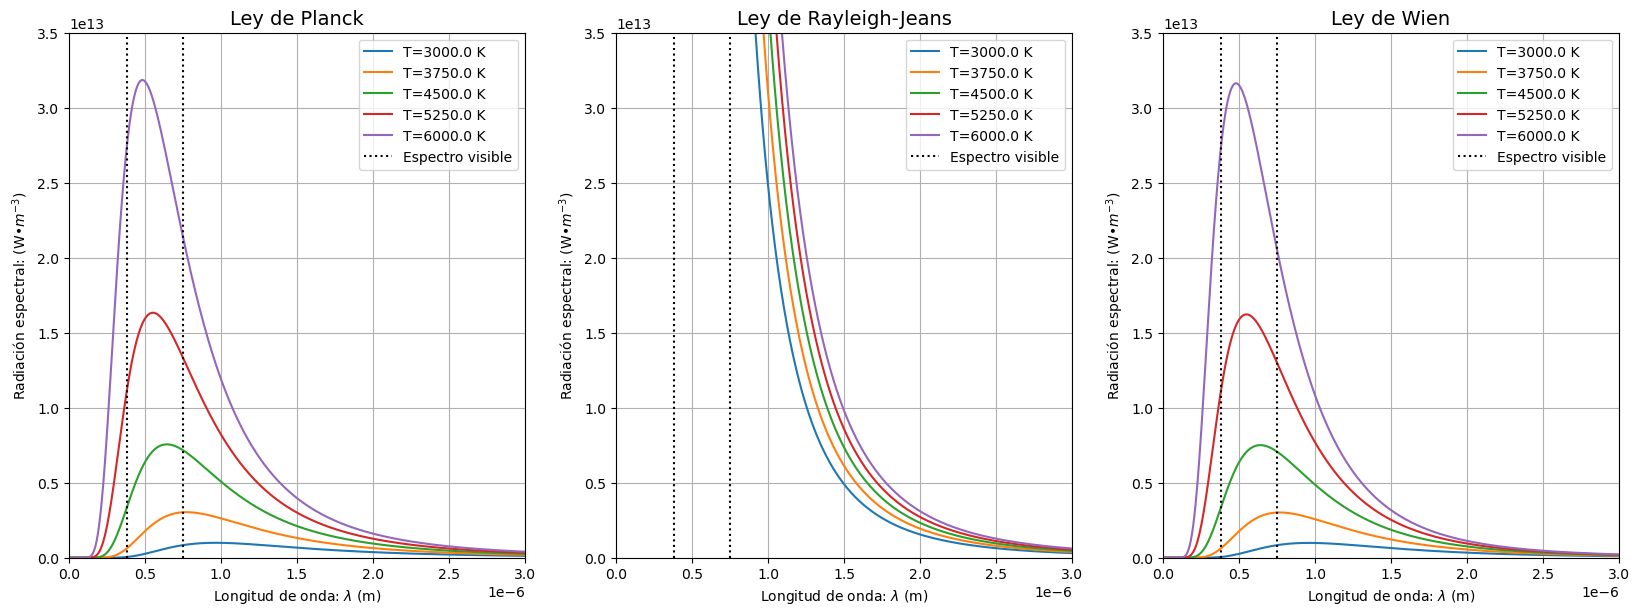

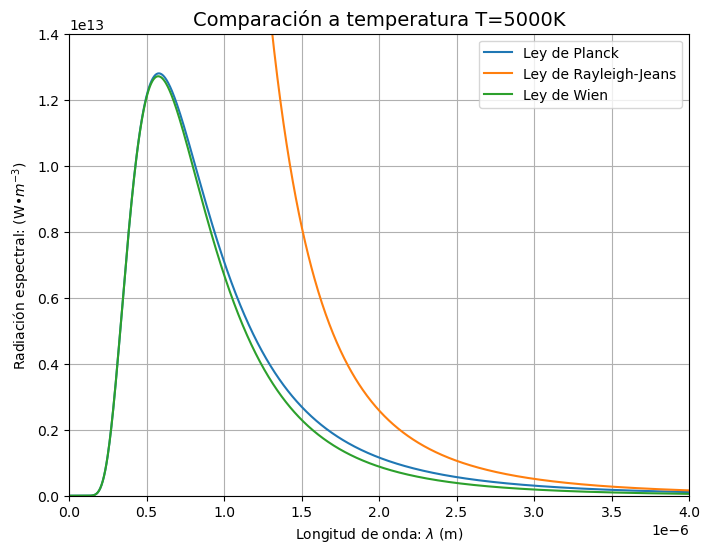

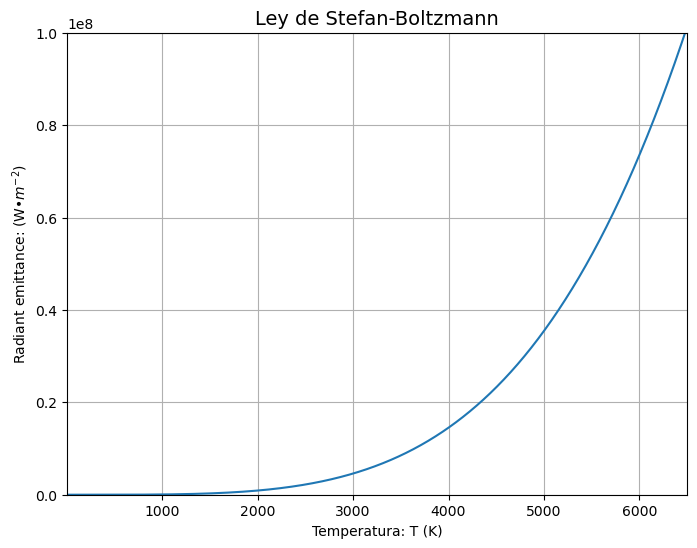

In [4]:
# Plots
# Plot de la ley de Planck
plt.figure(figsize=(20, 15))
plt.subplot(2,3,1)
for T in dT_disc:
    plt.plot(L, planck_law(L, T), label=f"T={decimal.Decimal(T).quantize(decimal.Decimal('0.0'))} K")
plt.axvline(x = Lmax, color='black', label = 'Espectro visible', linestyle='dotted')
plt.axvline(x = Lmin, color='black', linestyle='dotted')
plt.legend(loc='upper right')
plt.ylim(0, 3.5e13)
plt.xlim(0, 3e-6)
plt.xlabel('Longitud de onda: $\lambda$ (m)')
plt.ylabel('Radiación espectral: (W•$m^{-3}$)')
plt.title("Ley de Planck", size=14)
plt.grid()
# Plot de la ley de Rayleigh-Jeans
plt.subplot(2,3,2)
for T in dT_disc:
    plt.plot(L, rayleigh_law(L, T), label=f"T={decimal.Decimal(T).quantize(decimal.Decimal('0.0'))} K")
plt.axvline(x = Lmax, color='black', label = 'Espectro visible', linestyle='dotted')
plt.axvline(x = Lmin, color='black', linestyle='dotted')
plt.legend(loc='upper right')
plt.ylim(0, 3.5e13)
plt.xlim(0, 3e-6)
plt.xlabel('Longitud de onda: $\lambda$ (m)')
plt.ylabel('Radiación espectral: (W•$m^{-3}$)')
plt.title("Ley de Rayleigh-Jeans", size=14)
plt.grid()
# Plot de la ley de Wien
plt.subplot(2,3,3)
for T in dT_disc:
    plt.plot(L, wien_law(L, T), label=f"T={decimal.Decimal(T).quantize(decimal.Decimal('0.0'))} K")
plt.axvline(x = Lmax, color='black', label = 'Espectro visible', linestyle='dotted')
plt.axvline(x = Lmin, color='black', linestyle='dotted')
plt.legend(loc='upper right')
plt.ylim(0, 3.5e13)
plt.xlim(0, 3e-6)
plt.xlabel('Longitud de onda: $\lambda$ (m)')
plt.ylabel('Radiación espectral: (W•$m^{-3}$)')
plt.title("Ley de Wien", size=14)
plt.grid()
plt.show()
# Comparación
plt.figure(figsize=(8, 6))
plt.plot(L, planck_law(L, T_comp), label="Ley de Planck")
plt.plot(L, rayleigh_law(L, T_comp), label="Ley de Rayleigh-Jeans")
plt.plot(L, wien_law(L, T_comp), label="Ley de Wien")
plt.legend(loc='upper right')
plt.ylim(0, 1.4e13)
plt.xlim(0, 4e-6)
plt.xlabel('Longitud de onda: $\lambda$ (m)')
plt.ylabel('Radiación espectral: (W•$m^{-3}$)')
plt.title(f"Comparación a temperatura T={T_comp}K", size=14)
plt.grid()
plt.show()
# Plot de la ley de Stefan-Boltzmann
plt.figure(figsize=(8, 6))
plt.plot(dT_cont, stefan_law(dT_cont))
plt.ylim(0, 1e8)
plt.xlim(0.1, 6500)
plt.xlabel('Temperatura: T (K)')
plt.ylabel('Radiant emittance: (W•$m^{-2}$)')
plt.title("Ley de Stefan-Boltzmann", size=14)
plt.grid()
plt.show()